In [2]:
import zipfile
import os

base_path = "/content/aadhaar_data"
os.makedirs(base_path, exist_ok=True)

zip_files = [
    "/content/api_data_aadhar_enrolment.zip",
    "/content/api_data_aadhar_demographic.zip",
    "/content/api_data_aadhar_biometric.zip"
]

for zip_path in zip_files:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(base_path)

os.listdir(base_path)


['api_data_aadhar_biometric',
 'api_data_aadhar_demographic',
 'api_data_aadhar_enrolment']

In [4]:
import os

base_path = "/content/aadhaar_data"

for folder in os.listdir(base_path):
    print(f"\nContents of {folder}:")
    print(os.listdir(os.path.join(base_path, folder)))



Contents of api_data_aadhar_biometric:
['api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_biometric_0_500000.csv', 'api_data_aadhar_biometric_500000_1000000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv']

Contents of api_data_aadhar_demographic:
['api_data_aadhar_demographic_1500000_2000000.csv', 'api_data_aadhar_demographic_1000000_1500000.csv', 'api_data_aadhar_demographic_2000000_2071700.csv', 'api_data_aadhar_demographic_500000_1000000.csv', 'api_data_aadhar_demographic_0_500000.csv']

Contents of api_data_aadhar_enrolment:
['api_data_aadhar_enrolment_1000000_1006029.csv', 'api_data_aadhar_enrolment_0_500000.csv', 'api_data_aadhar_enrolment_500000_1000000.csv']


In [5]:
import pandas as pd
import os


In [6]:
#load and combine biometric data
biometric_path = "/content/aadhaar_data/api_data_aadhar_biometric"

biometric_files = [
    os.path.join(biometric_path, f)
    for f in os.listdir(biometric_path)
    if f.endswith(".csv")
]

bio_update = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)

bio_update.shape


(1861108, 6)

In [7]:
#load and combine demographic data
demographic_path = "/content/aadhaar_data/api_data_aadhar_demographic"

demographic_files = [
    os.path.join(demographic_path, f)
    for f in os.listdir(demographic_path)
    if f.endswith(".csv")
]

demo_update = pd.concat(
    [pd.read_csv(f) for f in demographic_files],
    ignore_index=True
)

demo_update.shape


(2071700, 6)

In [8]:
#load and combine enrolment data
enrolment_path = "/content/aadhaar_data/api_data_aadhar_enrolment"

enrolment_files = [
    os.path.join(enrolment_path, f)
    for f in os.listdir(enrolment_path)
    if f.endswith(".csv")
]

enrolment = pd.concat(
    [pd.read_csv(f) for f in enrolment_files],
    ignore_index=True
)

enrolment.shape


(1006029, 7)

In [9]:
#quick verification for tables
bio_update.head()
demo_update.head()
enrolment.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [10]:
#inspection of column names
print("Enrolment columns:\n", enrolment.columns)
print("\nDemographic columns:\n", demo_update.columns)
print("\nBiometric columns:\n", bio_update.columns)


Enrolment columns:
 Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

Demographic columns:
 Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

Biometric columns:
 Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')


In [11]:
# Convert date columns to datetime (DD-MM-YYYY format)
enrolment["date"] = pd.to_datetime(enrolment["date"], dayfirst=True)
demo_update["date"] = pd.to_datetime(demo_update["date"], dayfirst=True)
bio_update["date"] = pd.to_datetime(bio_update["date"], dayfirst=True)

# Create YearMonth column
enrolment["YearMonth"] = enrolment["date"].dt.to_period("M")
demo_update["YearMonth"] = demo_update["date"].dt.to_period("M")
bio_update["YearMonth"] = bio_update["date"].dt.to_period("M")


In [12]:
enrolment["date"].head()

,date
0,2025-12-31
1,2025-12-31
2,2025-12-31
3,2025-12-31
4,2025-12-31


In [13]:
#aggregating montly totals
monthly_enrolment = (
    enrolment
    .groupby("YearMonth")[["age_0_5", "age_5_17", "age_18_greater"]]
    .sum()
    .reset_index()
)

monthly_demo = (
    demo_update
    .groupby("YearMonth")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
    .reset_index()
)

monthly_bio = (
    bio_update
    .groupby("YearMonth")[["bio_age_5_17", "bio_age_17_"]]
    .sum()
    .reset_index()
)


In [14]:
#total months of data available
enrolment["YearMonth"].nunique()


9

In [15]:
#sort by time
monthly_enrolment = monthly_enrolment.sort_values("YearMonth")
monthly_demo = monthly_demo.sort_values("YearMonth")
monthly_bio = monthly_bio.sort_values("YearMonth")


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    palette="Set2",
    font_scale=1.15
)


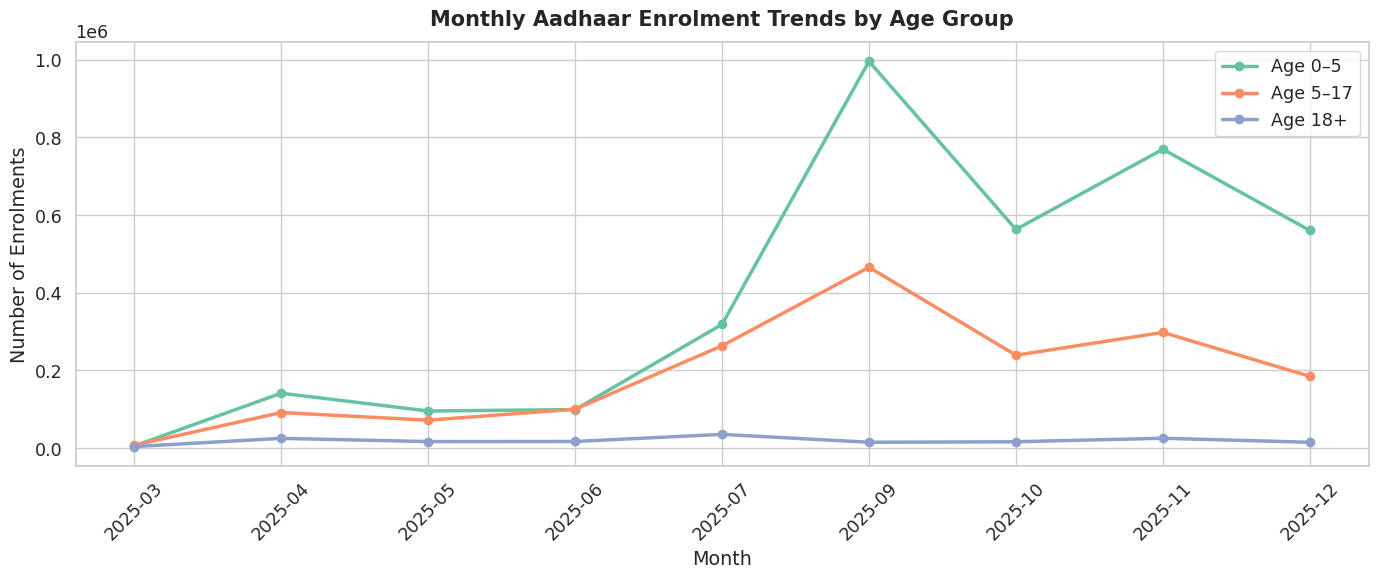

In [28]:
# graph plotting // enrolment updates trend
plt.figure(figsize=(14,6))

plt.plot(
    monthly_enrolment["YearMonth"].astype(str),
    monthly_enrolment["age_0_5"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 0–5"
)

plt.plot(
    monthly_enrolment["YearMonth"].astype(str),
    monthly_enrolment["age_5_17"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 5–17"
)

plt.plot(
    monthly_enrolment["YearMonth"].astype(str),
    monthly_enrolment["age_18_greater"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 18+"
)

plt.title(
    "Monthly Aadhaar Enrolment Trends by Age Group",
    fontsize=15,
    weight="bold",
    pad=12
)

plt.xlabel("Month")
plt.ylabel("Number of Enrolments")

plt.xticks(rotation=45)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()



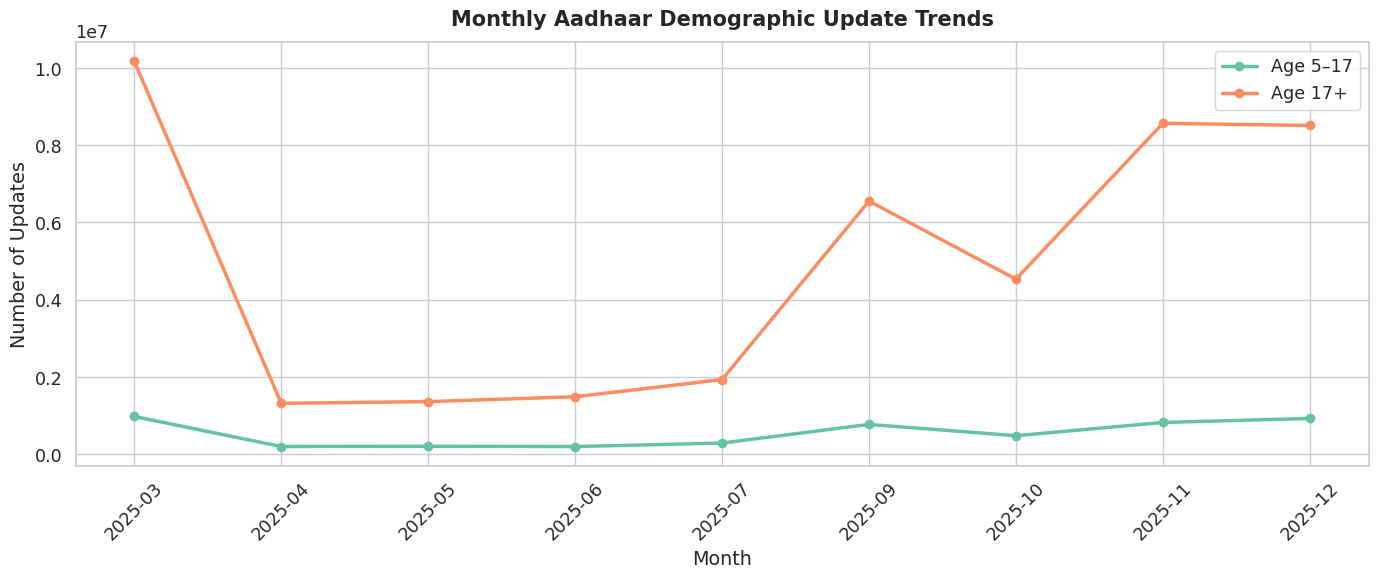

In [29]:
# graph plotting // demographic updates trend
plt.figure(figsize=(14,6))

plt.plot(
    monthly_demo["YearMonth"].astype(str),
    monthly_demo["demo_age_5_17"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 5–17"
)

plt.plot(
    monthly_demo["YearMonth"].astype(str),
    monthly_demo["demo_age_17_"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 17+"
)

plt.title(
    "Monthly Aadhaar Demographic Update Trends",
    fontsize=15,
    weight="bold",
    pad=12
)

plt.xlabel("Month")
plt.ylabel("Number of Updates")

plt.xticks(rotation=45)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()



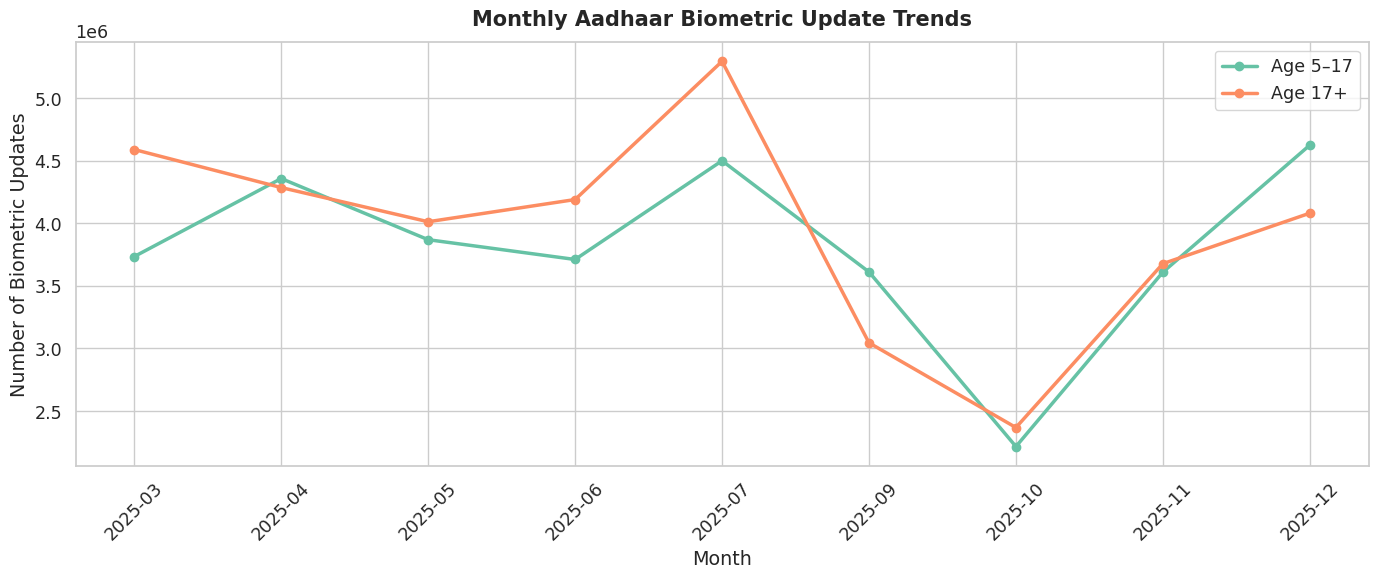

In [30]:
# graph plotting // Biometric updates trend
plt.figure(figsize=(14,6))

plt.plot(
    monthly_bio["YearMonth"].astype(str),
    monthly_bio["bio_age_5_17"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 5–17"
)

plt.plot(
    monthly_bio["YearMonth"].astype(str),
    monthly_bio["bio_age_17_"],
    marker="o",
    linewidth=2.5,
    markersize=6,
    label="Age 17+"
)

plt.title(
    "Monthly Aadhaar Biometric Update Trends",
    fontsize=15,
    weight="bold",
    pad=12
)

plt.xlabel("Month")
plt.ylabel("Number of Biometric Updates")

plt.xticks(rotation=45)
plt.legend(frameon=True)
plt.tight_layout()
plt.show()


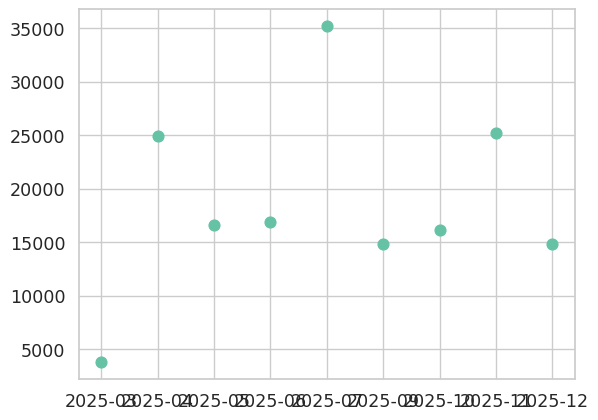

In [31]:
plt.scatter(
    monthly_enrolment["YearMonth"].astype(str),
    monthly_enrolment["age_18_greater"],
    s=60,
    zorder=5
)


In [18]:
#detect unusual enrolment months (18+)
mean_val = monthly_enrolment["age_18_greater"].mean()
std_val = monthly_enrolment["age_18_greater"].std()

monthly_enrolment["anomaly"] = (
    abs(monthly_enrolment["age_18_greater"] - mean_val) > 2 * std_val
)

monthly_enrolment[monthly_enrolment["anomaly"]]


,YearMonth,age_0_5,age_5_17,age_18_greater,anomaly


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    palette="Set2",
    font_scale=1.1
)


In [22]:
# Extract calendar month (1–12)
monthly_demo["Month"] = monthly_demo["YearMonth"].dt.month

In [23]:
seasonal_demo = (
    monthly_demo
    .groupby("Month")[["demo_age_5_17", "demo_age_17_"]]
    .mean()
)


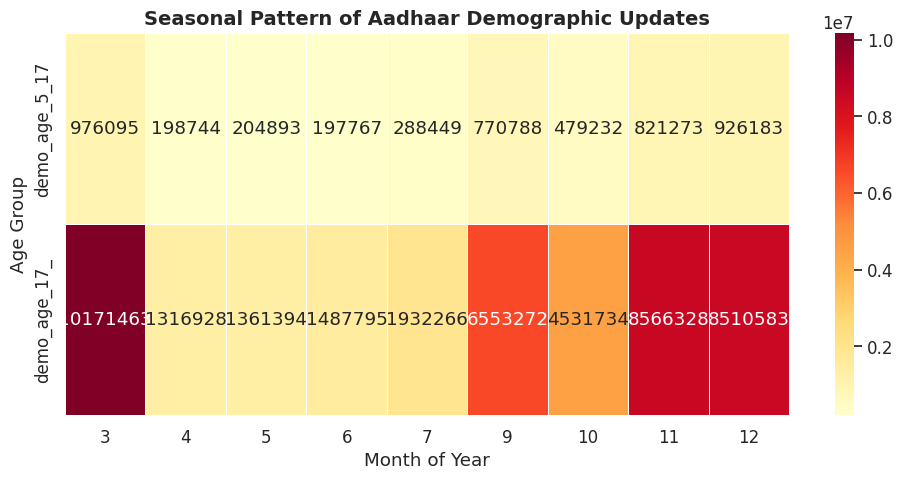

In [24]:
# heatmap creation
plt.figure(figsize=(10,5))

sns.heatmap(
    seasonal_demo.T,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    linewidths=0.5
)

plt.title("Seasonal Pattern of Aadhaar Demographic Updates", fontsize=14, weight="bold")
plt.xlabel("Month of Year")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()
